In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from networkx.drawing.nx_pydot import graphviz_layout as layout

In [5]:
# description: Edges represent fiber tracts that connect one vertex to another
dir_ = 'data/Budapest Connectome/'

def cal_nodesize(G):
    info = nx.info(G).split('\n')
    return int(info[2].strip().split(':')[1])

def plot_network(G):
    plt.figure(figsize=(12,9))
    nx.draw(G, node_size=60, node_color=range(cal_nodesize(G)), cmap=plt.cm.Blues) 
    plt.show()
    
def plot_circular(G):
    pos = layout(G, prog="twopi", args="")
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_size=cal_nodesize(G), alpha=0.5, node_color="blue", with_labels=False)
    plt.axis("equal")
    plt.show()

def plot_hist(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(figsize=(14,7))
    plt.bar(deg, cnt, width=0.80, color="b")

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()
    
def read_and_plot(filename):
    G = nx.read_edgelist(dir_+filename+'/'+filename+'.edges', create_using=nx.Graph(), nodetype=int)
    plot_network(G)
    
def read_and_plot_sub(filename, sub):
    G = nx.read_edgelist(dir_+filename+'/'+filename+'.edges', create_using=nx.Graph(), nodetype=int)
    # The induced subgraph of the graph contains the nodes in nbunch and the edges between those nodes.
    sub_G = G.subgraph(np.arange(1,sub+1))
    plot_network(sub_G)

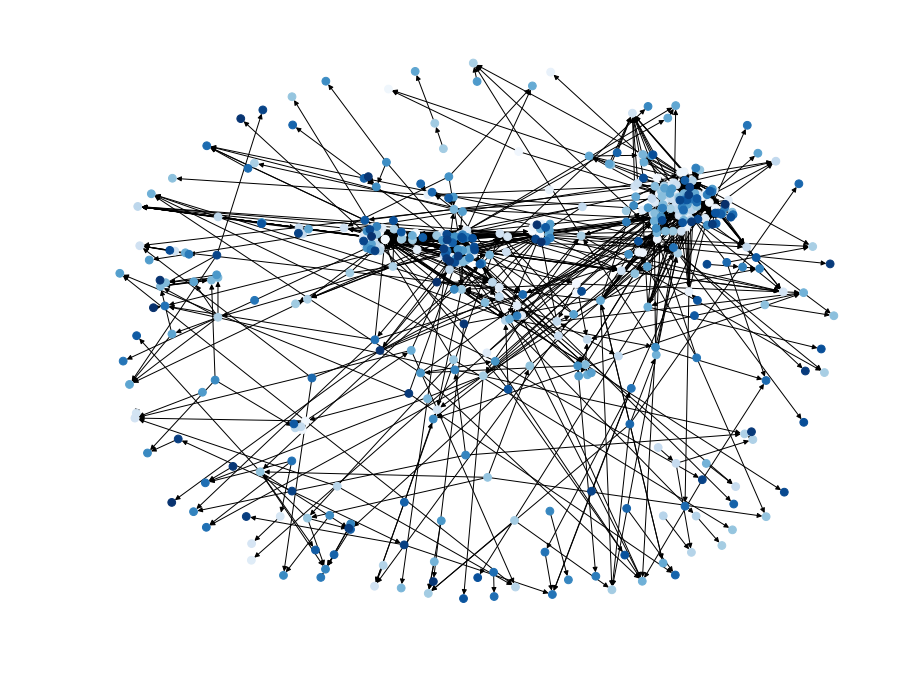

In [6]:
df = pd.read_csv(dir_ + 'budapest_connectome_3.0_209_0_median.csv', delimiter=';')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, source='id node1', target='id node2', edge_attr='edge weight(med nof)', create_using=nx.DiGraph())

plot_network(G)